In [1]:
%matplotlib inline


# Morphological Snakes


*Morphological Snakes* [1]_ are a family of methods for image segmentation.
Their behavior is similar to that of active contours (for example, *Geodesic
Active Contours* [2]_ or *Active Contours without Edges* [3]_). However,
*Morphological Snakes* use morphological operators (such as dilation or
erosion) over a binary array instead of solving PDEs over a floating point
array, which is the standard approach for active contours. This makes
*Morphological Snakes* faster and numerically more stable than their
traditional counterpart.

There are two *Morphological Snakes* methods available in this implementation:
*Morphological Geodesic Active Contours* (**MorphGAC**, implemented in the
function ``morphological_geodesic_active_contour``) and *Morphological Active
Contours without Edges* (**MorphACWE**, implemented in the function
``morphological_chan_vese``).

**MorphGAC** is suitable for images with visible contours, even when these
contours might be noisy, cluttered, or partially unclear. It requires, however,
that the image is preprocessed to highlight the contours. This can be done
using the function ``inverse_gaussian_gradient``, although the user might want
to define their own version. The quality of the **MorphGAC** segmentation
depends greatly on this preprocessing step.

On the contrary, **MorphACWE** works well when the pixel values of the inside
and the outside regions of the object to segment have different averages.
Unlike **MorphGAC**, **MorphACWE** does not require that the contours of the
object are well defined, and it works over the original image without any
preceding processing. This makes **MorphACWE** easier to use and tune than
**MorphGAC**.

References
----------

.. [1] A Morphological Approach to Curvature-based Evolution of Curves and
       Surfaces, Pablo Márquez-Neila, Luis Baumela and Luis Álvarez. In IEEE
       Transactions on Pattern Analysis and Machine Intelligence (PAMI),
       2014, :DOI:`10.1109/TPAMI.2013.106`
.. [2] Geodesic Active Contours, Vicent Caselles, Ron Kimmel and Guillermo
       Sapiro. In International Journal of Computer Vision (IJCV), 1997,
       :DOI:`10.1023/A:1007979827043`
.. [3] Active Contours without Edges, Tony Chan and Luminita Vese. In IEEE
       Transactions on Image Processing, 2001, :DOI:`10.1109/83.902291`


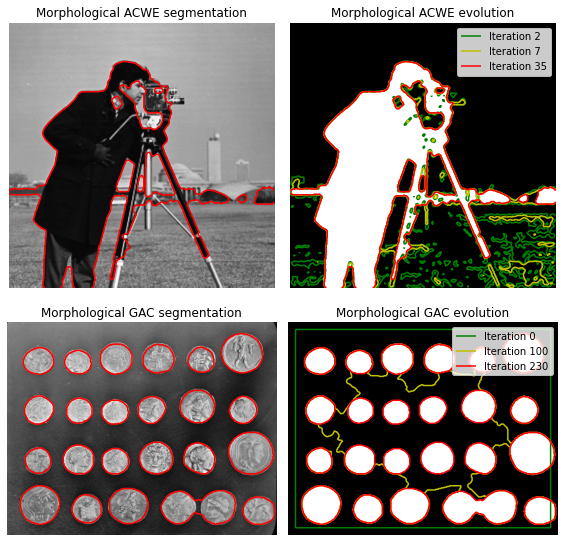

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = img_as_float(data.camera())

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 35, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)


# Morphological GAC
image = img_as_float(data.coins())
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, 230, init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

ax[2].imshow(image, cmap="gray")
ax[2].set_axis_off()
ax[2].contour(ls, [0.5], colors='r')
ax[2].set_title("Morphological GAC segmentation", fontsize=12)

ax[3].imshow(ls, cmap="gray")
ax[3].set_axis_off()
contour = ax[3].contour(evolution[0], [0.5], colors='g')
contour.collections[0].set_label("Iteration 0")
contour = ax[3].contour(evolution[100], [0.5], colors='y')
contour.collections[0].set_label("Iteration 100")
contour = ax[3].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 230")
ax[3].legend(loc="upper right")
title = "Morphological GAC evolution"
ax[3].set_title(title, fontsize=12)

fig.tight_layout()
plt.show()